<a href="https://colab.research.google.com/github/sanam-re/ConcreteCube/blob/master/Working_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
df = pd.read_csv("/compresive_strength_concrete.csv")
df.columns


Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [ ]:
df_new = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'BFS',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarser_agg',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_agg',
       'Age (day)':'Days',
       'Concrete compressive strength(MPa, megapascals) ':'Comp_str'})

In [ ]:
df_new.columns



Index(['Cement', 'BFS', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarser_agg',
       'Fine_agg', 'Days', 'Comp_str'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
features = ['Cement', 'BFS', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarser_agg',
       'Fine_agg', 'Days']
targets = ['Comp_str']

X_train, X_test, y_train, y_test = train_test_split(df_new[features], df_new[targets], test_size=0.20, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params_RFR = [{'n_estimators':[200, 250, 300, 350, 400, 450, 500, 550, 600]}]

RFR = RandomForestRegressor()
grid_RFR = GridSearchCV(RFR, params_RFR, cv=3, scoring='r2')
model_RFR = grid_RFR.fit(X_train, y_train)


RFR_1 = RandomForestRegressor(n_estimators=300, criterion='mse')




model_RFR_1 = RFR_1.fit(X_train,y_train)




y_RFR1 = model_RFR_1.predict(X_test)

The R^2 for the test data in this Random Forest Regression is:  0.8779991187261029
The R^2 for the training data in this Random Forest Regression is:  0.9865576440187063
The Root Mean Squared Error for this is:  5.606853680651977


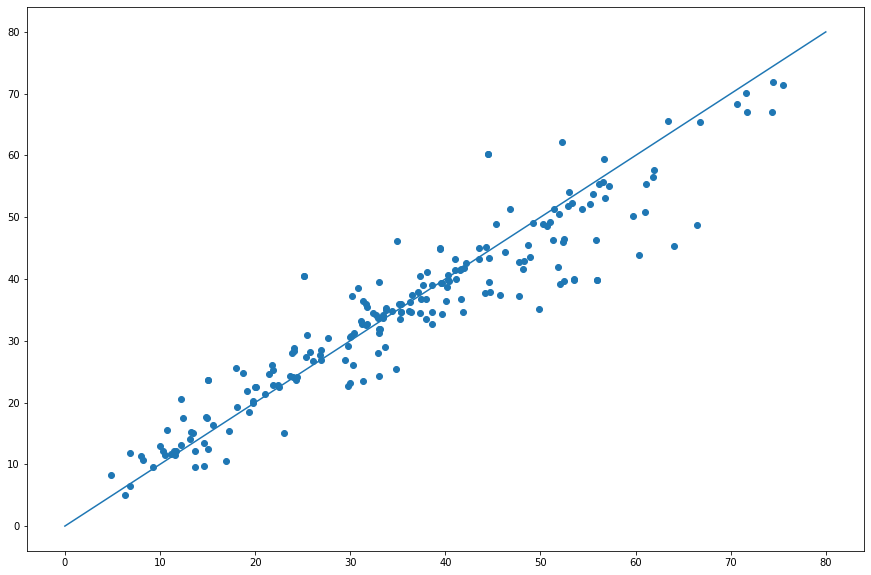

In [ ]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
x = np.linspace(0,80,1000)
y=x
plt.scatter(y_test, y_RFR1)
plt.plot(x,y)

print("The R^2 for the test data in this Random Forest Regression is: ", model_RFR_1.score(X_test,y_test))

print("The R^2 for the training data in this Random Forest Regression is: ", model_RFR_1.score(X_train,y_train))

RMSE = np.sqrt(mean_squared_error(y_test,y_RFR1))

print("The Root Mean Squared Error for this is: ",RMSE )

In [ ]:
import pickle

pickle.dump(RFR_1,open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))

# New Section